Code for Modeling the Property Tax

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import pickle

Creating the model and feature engineering :

In [2]:
df = pd.read_csv('Main_Table_of_RealEstate_with_tax.csv')
features = ['bedrooms', 'bathrooms', 'price', 'state','zestimate','priceForHDP','rentZestimate','zipcode']
target = 'taxAssessedValue'

X = df[features]
y = df[target]

le = LabelEncoder()
X['state'] = le.fit_transform(X['state'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 104448090414.35051
R-squared Score: 0.9010624526340104


<ipython-input-2-edd0752b772f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = le.fit_transform(X['state'])


In [3]:
df.corr()

<ipython-input-3-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bathrooms,bedrooms,daysOnZillow,isFeatured,isNonOwnerOccupied,isPreforeclosureAuction,isPremierBuilder,isShowcaseListing,isUnmappable,isZillowOwned,...,longitude,price,priceForHDP,rentZestimate,shouldHighlight,zestimate,zipcode,zpid,taxRate,taxAssessedValue
bathrooms,1.000000,0.730359,0.054376,NaN,NaN,NaN,0.041503,NaN,NaN,NaN,...,-0.056406,0.454287,0.454287,0.434954,NaN,0.376340,0.079635,-0.026322,-0.017150,0.507812
bedrooms,0.730359,1.000000,0.041859,NaN,NaN,NaN,-0.041797,NaN,NaN,NaN,...,-0.050162,0.248448,0.248448,0.251155,NaN,0.199804,-0.025787,-0.069535,0.017485,0.291245
daysOnZillow,0.054376,0.041859,1.000000,NaN,NaN,NaN,-0.027947,NaN,NaN,NaN,...,-0.068588,0.362519,0.362519,0.268998,NaN,0.347338,0.067649,0.014768,-0.089537,0.322837
isFeatured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isNonOwnerOccupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isPreforeclosureAuction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isPremierBuilder,0.041503,-0.041797,-0.027947,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,-0.118853,0.000929,0.000929,0.034733,NaN,-0.058800,0.119120,0.318537,-0.058679,-0.019624
isShowcaseListing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isUnmappable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isZillowOwned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting:

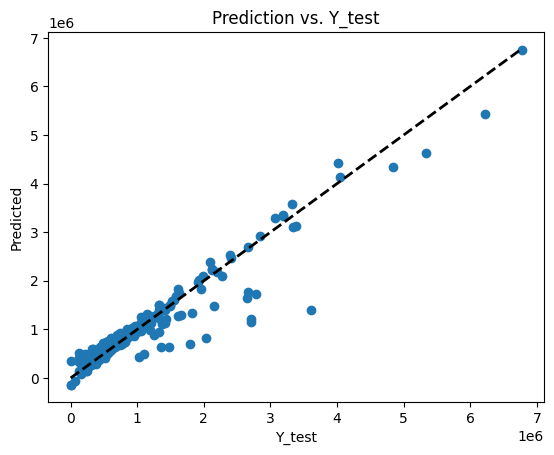

In [4]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Identity line
plt.xlabel('Y_test')
plt.ylabel('Predicted')
plt.title('Prediction vs. Y_test')
plt.show()

Creating the model and testing it against new data:

In [5]:
filename = 'linear_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open('linear_regression_model.sav', 'rb'))

new_data = pd.read_csv('new_data.csv')

new_data['state'] = le.transform(new_data['state'])

new_predictions = loaded_model.predict(new_data[features])

new_data['PredictedTaxes'] = new_predictions

new_data.to_csv('new_data.csv', index=False)